In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

import datetime as dt
import time
from binance.client import Client
from binance.enums import *
from binance.cm_futures import CMFutures

In [2]:
#API
api_key = ''
api_secret = ''

client = Client(api_key,api_secret)

coin = "ETHUSDT"

date_now = dt.datetime.now()
date_start = date_now-dt.timedelta(days=365 * 5)
now = date_now.strftime("%Y-%m-%d %H:%M:%S")
start = date_start.strftime("%Y-%m-%d")

df = pd.DataFrame(client.futures_historical_klines(
    symbol=coin,
    interval=client.KLINE_INTERVAL_1DAY, # can play with this e.g. '1h', '4h', '1w', etc.
    start_str=start,
    end_str=now
))
df = df.iloc[:, :6]
df.columns = ['date', 'open', 'high', 'low', f'{coin}', 'volume']
df['date'] = pd.to_datetime(df['date'], unit='ms')
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col])
df = df.set_index("date")
data = df[[coin]]

# data["Return"] = data[coin].pct_change()
pd.set_option('display.max_rows', 10)

data


,ETHUSDT
date,
2019-11-27,152.52
2019-11-28,150.48
2019-11-29,154.41
2019-11-30,151.38
2019-12-01,150.65
...,...
2024-02-25,3115.24
2024-02-26,3178.60
2024-02-27,3244.98


In [3]:
data.rename(columns = {data.columns[0]: "PRICE"},
               inplace = True)

/var/folders/xj/8fm23lb137v05ps150d3h5kr0000gn/T/ipykernel_22107/1915242008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {data.columns[0]: "PRICE"},


In [4]:
data["SMA_40"] = data["PRICE"].rolling(window = 40).mean()
data["SMA_250"] = data["PRICE"].rolling(window = 250).mean()

data

/var/folders/xj/8fm23lb137v05ps150d3h5kr0000gn/T/ipykernel_22107/2038786263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SMA_40"] = data["PRICE"].rolling(window = 40).mean()
/var/folders/xj/8fm23lb137v05ps150d3h5kr0000gn/T/ipykernel_22107/2038786263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SMA_250"] = data["PRICE"].rolling(window = 250).mean()


,PRICE,SMA_40,SMA_250
date,,,
2019-11-27,152.52,NaN,NaN
2019-11-28,150.48,NaN,NaN
2019-11-29,154.41,NaN,NaN
2019-11-30,151.38,NaN,NaN
2019-12-01,150.65,NaN,NaN
...,...,...,...
2024-02-25,3115.24,2542.00700,2007.73624
2024-02-26,3178.60,2558.20650,2012.89740
2024-02-27,3244.98,2577.54875,2018.39188


<AxesSubplot:xlabel='date'>

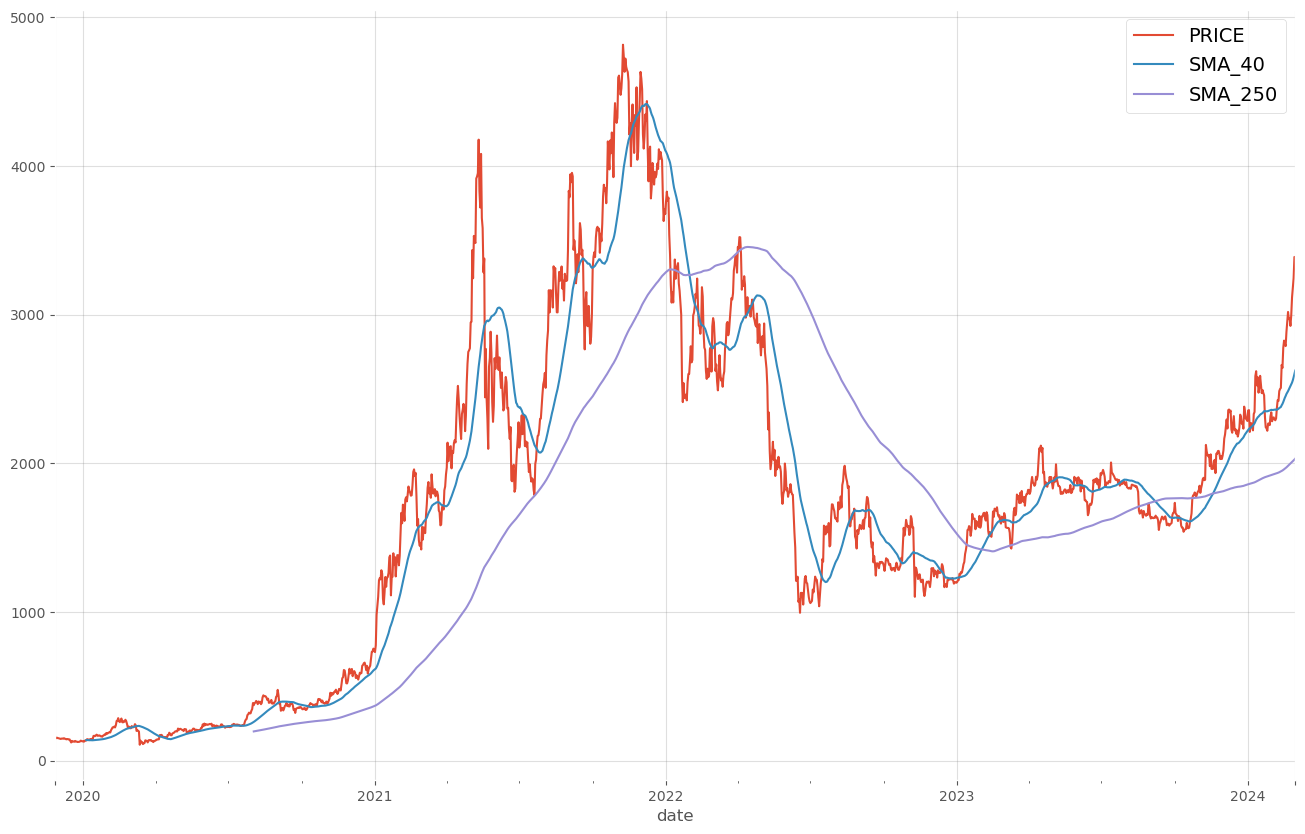

In [5]:
data.plot(figsize = (16, 10)
             )

In [6]:
data["POSITIONS"] = np.where(data["SMA_40"] < data["SMA_250"],
                                -1, 1)

/var/folders/xj/8fm23lb137v05ps150d3h5kr0000gn/T/ipykernel_22107/1283623564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["POSITIONS"] = np.where(data["SMA_40"] < data["SMA_250"],


In [7]:
data.dropna(inplace = True)

/var/folders/xj/8fm23lb137v05ps150d3h5kr0000gn/T/ipykernel_22107/339833404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


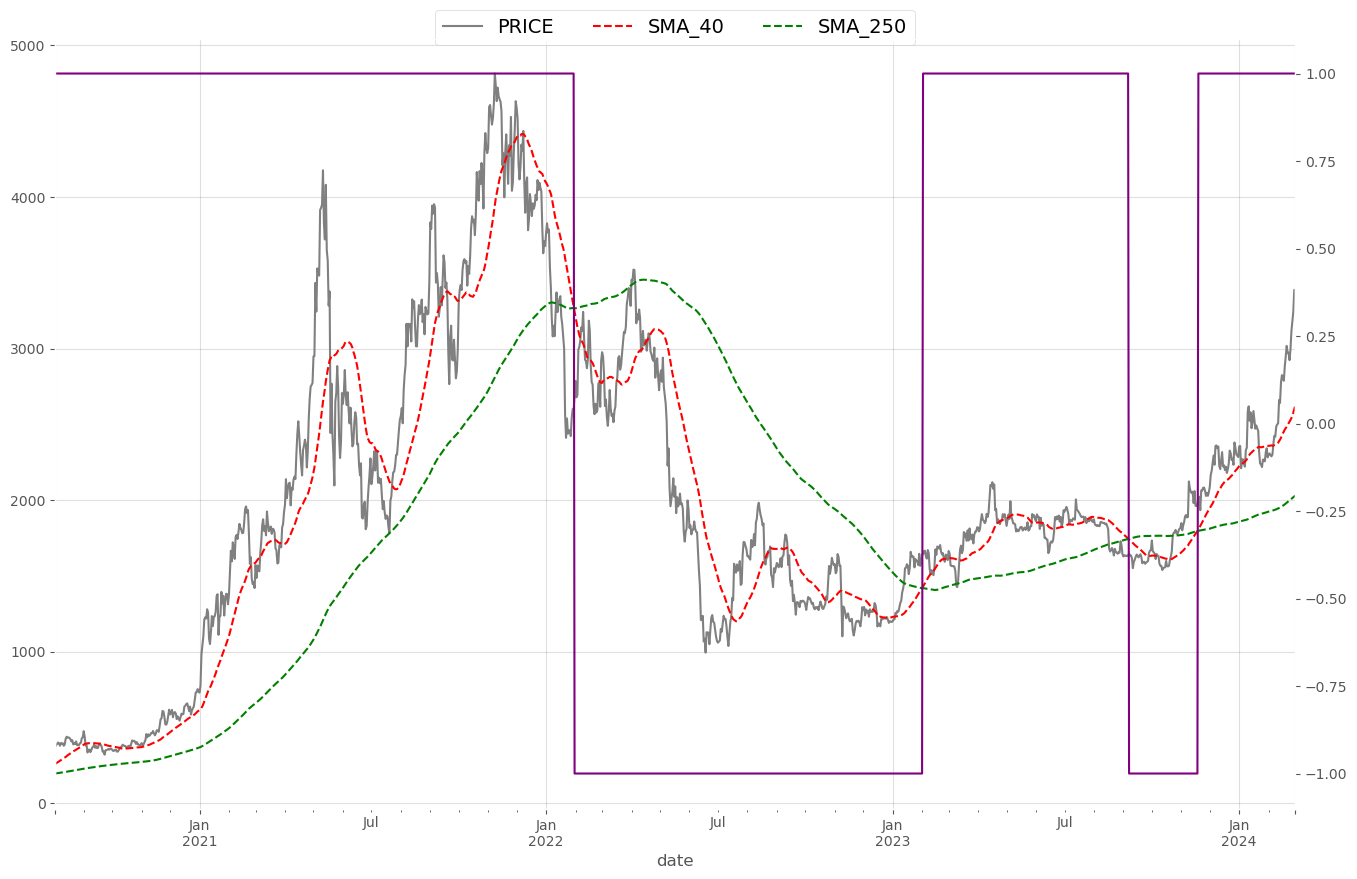

In [8]:
ax = data[["PRICE",
         "SMA_40",
         "SMA_250",
         "POSITIONS"]
       ].plot(secondary_y = "POSITIONS",
              figsize = (16, 10),
              style = ["grey",
                       "r--",
                       "g--",
                       "purple"]
              )

ax.legend(loc = "upper center",
          bbox_to_anchor = (0.5, 1.05),
          ncol = 3
          )

In [9]:
data["RETURNS"] = np.log(data["PRICE"] / data["PRICE"].shift(1)
                            )
data

/var/folders/xj/8fm23lb137v05ps150d3h5kr0000gn/T/ipykernel_22107/3538631087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RETURNS"] = np.log(data["PRICE"] / data["PRICE"].shift(1)


,PRICE,SMA_40,SMA_250,POSITIONS,RETURNS
date,,,,,
2020-08-02,372.85,260.16175,196.26152,1,NaN
2020-08-03,386.20,263.95325,197.19624,1,0.035179
2020-08-04,390.10,267.89325,198.15472,1,0.010048
2020-08-05,400.95,272.17550,199.14088,1,0.027434
2020-08-06,395.09,276.52925,200.11572,1,-0.014723
...,...,...,...,...,...
2024-02-25,3115.24,2542.00700,2007.73624,1,0.039566
2024-02-26,3178.60,2558.20650,2012.89740,1,0.020135
2024-02-27,3244.98,2577.54875,2018.39188,1,0.020668


<AxesSubplot:>

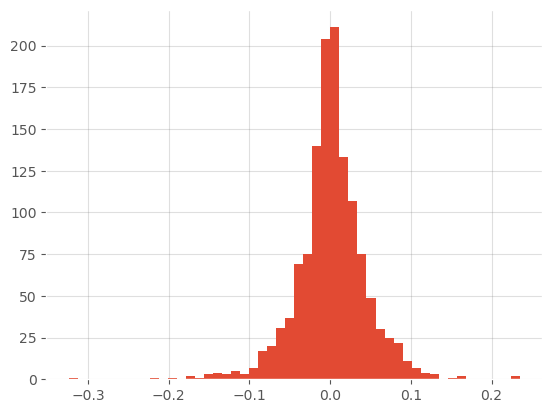

In [10]:
data["RETURNS"].hist(bins = 50)

In [11]:
data["STRATEGY"] = data["POSITIONS"].shift(1) * data["RETURNS"]
data

/var/folders/xj/8fm23lb137v05ps150d3h5kr0000gn/T/ipykernel_22107/2721059414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["STRATEGY"] = data["POSITIONS"].shift(1) * data["RETURNS"]


,PRICE,SMA_40,SMA_250,POSITIONS,RETURNS,STRATEGY
date,,,,,,
2020-08-02,372.85,260.16175,196.26152,1,NaN,NaN
2020-08-03,386.20,263.95325,197.19624,1,0.035179,0.035179
2020-08-04,390.10,267.89325,198.15472,1,0.010048,0.010048
2020-08-05,400.95,272.17550,199.14088,1,0.027434,0.027434
2020-08-06,395.09,276.52925,200.11572,1,-0.014723,-0.014723
...,...,...,...,...,...,...
2024-02-25,3115.24,2542.00700,2007.73624,1,0.039566,0.039566
2024-02-26,3178.60,2558.20650,2012.89740,1,0.020135,0.020135
2024-02-27,3244.98,2577.54875,2018.39188,1,0.020668,0.020668


#### Derives the log returns of the strategy given the positionings and market returns.

In [12]:
data[["RETURNS", "STRATEGY"]].sum()

RETURNS     2.205487
STRATEGY    2.786591
dtype: float64

#### Sums up the single log return values for both the stock and the strategy (for learning purposes).

In [13]:
data[["RETURNS", "STRATEGY"]
        ].sum().apply(np.exp)

RETURNS      9.074668
STRATEGY    16.225614
dtype: float64

In [14]:
data[["RETURNS", "STRATEGY"]
        ].cumsum().apply(np.exp)

,RETURNS,STRATEGY
date,,
2020-08-02,NaN,NaN
2020-08-03,1.035805,1.035805
2020-08-04,1.046265,1.046265
2020-08-05,1.075365,1.075365
2020-08-06,1.059649,1.059649
...,...,...
2024-02-25,8.355210,14.939214
2024-02-26,8.525144,15.243059
2024-02-27,8.703178,15.561386


<AxesSubplot:xlabel='date'>

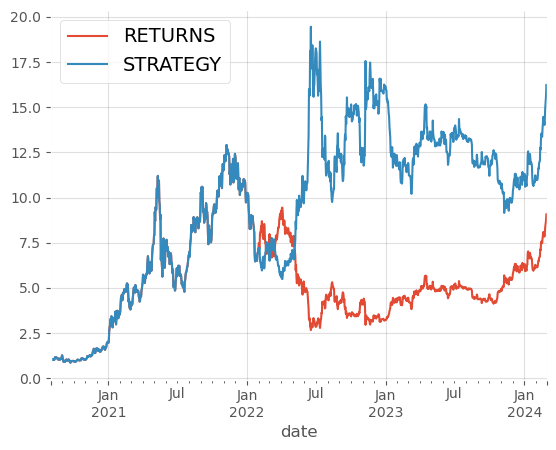

In [15]:
data[["RETURNS", "STRATEGY"]
        ].cumsum().apply(np.exp).plot()

In [16]:
data[["RETURNS", "STRATEGY"]].mean() * 252

RETURNS     0.425561
STRATEGY    0.537688
dtype: float64

In [17]:
np.exp(data[["RETURNS", "STRATEGY"]].mean() * 252) - 1

RETURNS     0.530449
STRATEGY    0.712045
dtype: float64

In [18]:
data[["RETURNS", "STRATEGY"]].std() * 252 ** 0.5

RETURNS     0.694468
STRATEGY    0.694159
dtype: float64

In [19]:
(data[["RETURNS", "STRATEGY"]].apply(np.exp) - 1).std() * 252 ** 0.5

RETURNS     0.692252
STRATEGY    0.695257
dtype: float64

In [20]:
data["CUMULATIVE_RETURNS"] = data["STRATEGY"].cumsum().apply(np.exp)
data

/var/folders/xj/8fm23lb137v05ps150d3h5kr0000gn/T/ipykernel_22107/3723320060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CUMULATIVE_RETURNS"] = data["STRATEGY"].cumsum().apply(np.exp)


,PRICE,SMA_40,SMA_250,POSITIONS,RETURNS,STRATEGY,CUMULATIVE_RETURNS
date,,,,,,,
2020-08-02,372.85,260.16175,196.26152,1,NaN,NaN,NaN
2020-08-03,386.20,263.95325,197.19624,1,0.035179,0.035179,1.035805
2020-08-04,390.10,267.89325,198.15472,1,0.010048,0.010048,1.046265
2020-08-05,400.95,272.17550,199.14088,1,0.027434,0.027434,1.075365
2020-08-06,395.09,276.52925,200.11572,1,-0.014723,-0.014723,1.059649
...,...,...,...,...,...,...,...
2024-02-25,3115.24,2542.00700,2007.73624,1,0.039566,0.039566,14.939214
2024-02-26,3178.60,2558.20650,2012.89740,1,0.020135,0.020135,15.243059
2024-02-27,3244.98,2577.54875,2018.39188,1,0.020668,0.020668,15.561386


In [21]:
data["MAX_GROSS_PERFORMANCE"] = data["CUMULATIVE_RETURNS"].cummax()
data

/var/folders/xj/8fm23lb137v05ps150d3h5kr0000gn/T/ipykernel_22107/426231798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MAX_GROSS_PERFORMANCE"] = data["CUMULATIVE_RETURNS"].cummax()


,PRICE,SMA_40,SMA_250,POSITIONS,RETURNS,STRATEGY,CUMULATIVE_RETURNS,MAX_GROSS_PERFORMANCE
date,,,,,,,,
2020-08-02,372.85,260.16175,196.26152,1,NaN,NaN,NaN,NaN
2020-08-03,386.20,263.95325,197.19624,1,0.035179,0.035179,1.035805,1.035805
2020-08-04,390.10,267.89325,198.15472,1,0.010048,0.010048,1.046265,1.046265
2020-08-05,400.95,272.17550,199.14088,1,0.027434,0.027434,1.075365,1.075365
2020-08-06,395.09,276.52925,200.11572,1,-0.014723,-0.014723,1.059649,1.075365
...,...,...,...,...,...,...,...,...
2024-02-25,3115.24,2542.00700,2007.73624,1,0.039566,0.039566,14.939214,19.455335
2024-02-26,3178.60,2558.20650,2012.89740,1,0.020135,0.020135,15.243059,19.455335
2024-02-27,3244.98,2577.54875,2018.39188,1,0.020668,0.020668,15.561386,19.455335


<AxesSubplot:xlabel='date'>

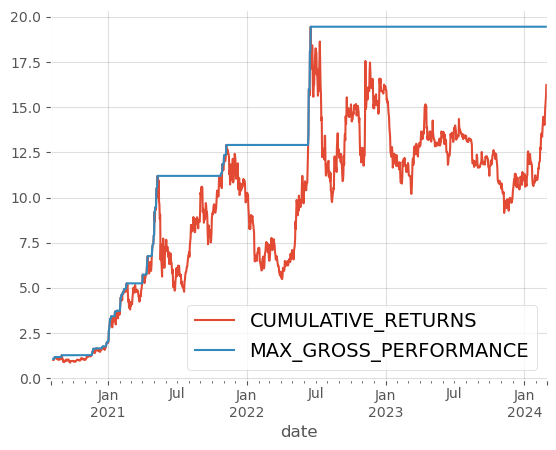

In [22]:
data[["CUMULATIVE_RETURNS", "MAX_GROSS_PERFORMANCE"]
        ].dropna().plot()

In [23]:
DRAWDOWN = data["MAX_GROSS_PERFORMANCE"] - data["CUMULATIVE_RETURNS"]

In [24]:
DRAWDOWN.max()

10.306682409382729

In [25]:
PERIOD = (DRAWDOWN[DRAWDOWN == 0].index[1:].to_pydatetime() - 
          DRAWDOWN[DRAWDOWN == 0].index[:-1].to_pydatetime()
          )

In [26]:
PERIOD.max()

datetime.timedelta(days=216)